In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants as cte
from scipy import stats

In [2]:
def ordenar(dados):
  dados["tensão"] = np.sort(dados["tensão"])
  dados["corrente"] = np.sort(dados["corrente"])
  return dados

T_1483 = pd.read_csv("T_1483.csv")
T_1395 = pd.read_csv("T_1395.csv")
T_1600 = pd.read_csv("T_1600.csv")
T_1700 = pd.read_csv("T_1700.csv")
T_1750 = pd.read_csv("T_1750.csv")
T_1805 = pd.read_csv("T_1805.csv")

T_1483.columns=["tensão", "corrente"]
T_1395.columns=["tensão", "corrente"]
T_1600.columns=["tensão", "corrente"]
T_1700.columns=["tensão", "corrente"]
T_1750.columns=["tensão", "corrente"]
T_1805.columns=["tensão", "corrente"]


T_1700 = ordenar(T_1700)
T_1805 = ordenar(T_1805)
T_1750 = ordenar(T_1750)
T_1600 = ordenar(T_1600)
T_1483 = ordenar(T_1483)
T_1395 = ordenar(T_1395)


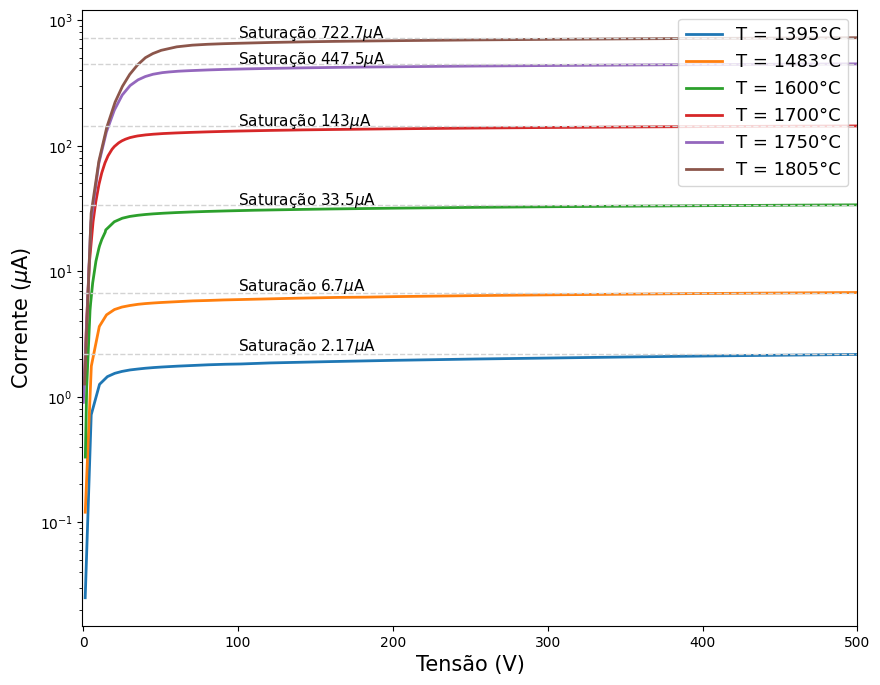

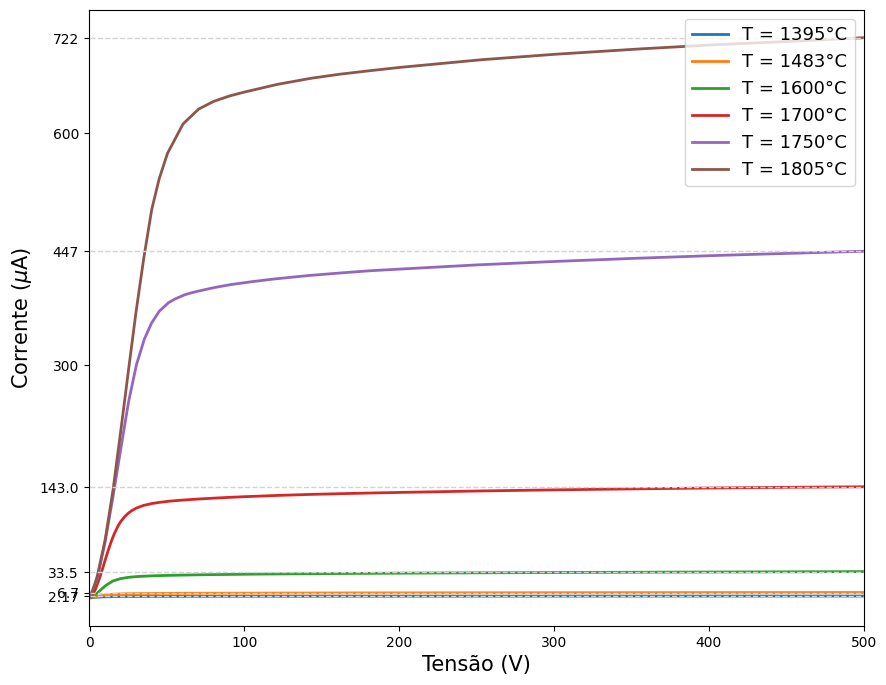

In [4]:

A_saturacao = [2.17, 6.7, 33.5, 143.0, 447.5, 722.7]
xmin=[0]*len(A_saturacao)
xmax=[500]*len(A_saturacao)
yticks = [ 300, 600, 2.17, 6.7, 33.5, 143.0, 447, 722]

# Gráfico escala log

plt.figure(figsize=(10,8))
plt.plot(T_1395["tensão"], T_1395["corrente"], linewidth=2, label="T = 1395°C")
plt.plot(T_1483["tensão"], T_1483["corrente"], linewidth=2, label="T = 1483°C")
plt.plot(T_1600["tensão"], T_1600["corrente"], linewidth=2, label="T = 1600°C")
plt.plot(T_1700["tensão"], T_1700["corrente"], linewidth=2, label="T = 1700°C")
plt.plot(T_1750["tensão"], T_1750["corrente"], linewidth=2, label="T = 1750°C")
plt.plot(T_1805["tensão"], T_1805["corrente"], linewidth=2, label="T = 1805°C")
plt.hlines(y=A_saturacao, xmax=xmax, xmin=xmin, linewidth=1, linestyle="--", color="lightgray")
plt.legend(fontsize=13, loc="upper right")
plt.xlabel("Tensão (V)", fontsize=15)
plt.ylabel(r"Corrente ($\mu$A)", fontsize=15)
plt.text(100, 7, s="Saturação 6.7$\mu$A", fontsize=11)
plt.text(100, 33.9, s=r"Saturação 33.5$\mu$A", fontsize=11)
plt.text(100, 143.4, s=r"Saturação 143$\mu$A", fontsize=11)
plt.text(100, 447.9, s=r"Saturação 447.5$\mu$A", fontsize=11)
plt.text(100, 723.2, s=r"Saturação 722.7$\mu$A", fontsize=11)
plt.text(100, 2.3, s=r"Saturação 2.17$\mu$A", fontsize=11)
plt.xlim(-0.5, 500)
plt.yscale("log")
plt.show()

# Gráfico escala normal

plt.figure(figsize=(10,8))
plt.plot(T_1395["tensão"], T_1395["corrente"], linewidth=2, label="T = 1395°C")
plt.plot(T_1483["tensão"], T_1483["corrente"], linewidth=2, label="T = 1483°C")
plt.plot(T_1600["tensão"], T_1600["corrente"], linewidth=2, label="T = 1600°C")
plt.plot(T_1700["tensão"], T_1700["corrente"], linewidth=2, label="T = 1700°C")
plt.plot(T_1750["tensão"], T_1750["corrente"], linewidth=2, label="T = 1750°C")
plt.plot(T_1805["tensão"], T_1805["corrente"], linewidth=2, label="T = 1805°C")
plt.hlines(y=A_saturacao, xmax=xmax, xmin=xmin, linewidth=1, linestyle="--", color="lightgray")
plt.legend(fontsize=13)
plt.xlabel("Tensão (V)", fontsize=15)
plt.ylabel(r"Corrente ($\mu$A)", fontsize=15)
plt.yticks(yticks, yticks)
plt.xlim(-0.5, 500)
plt.show()


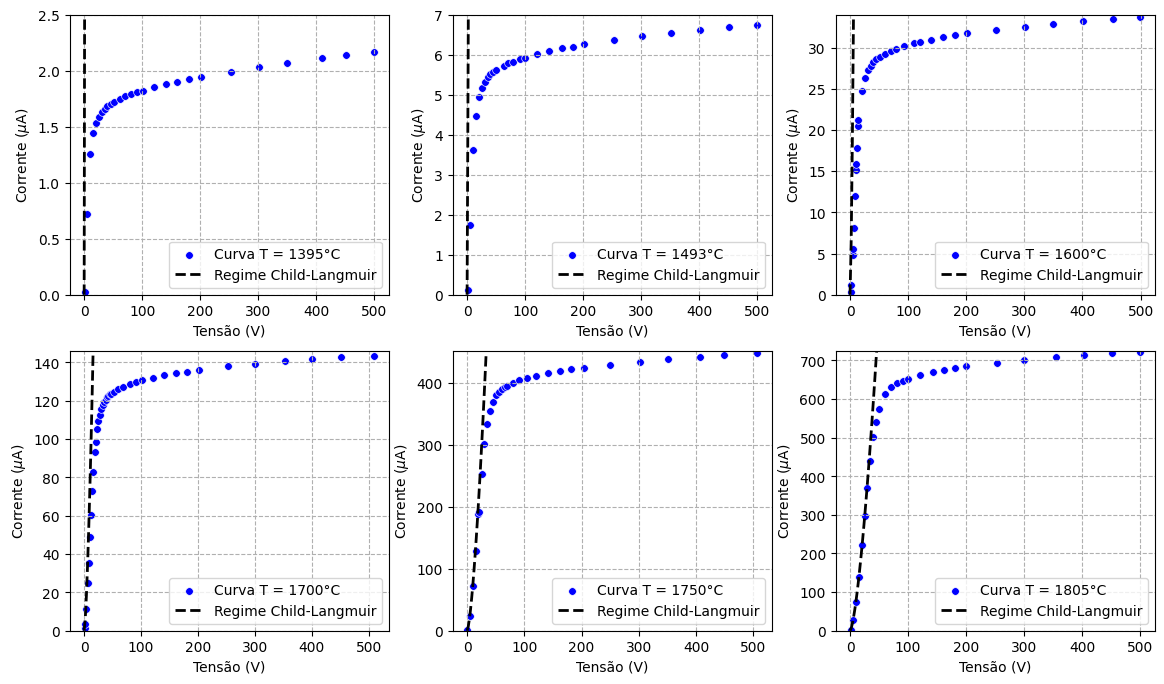

In [ ]:
# Gráfico do Regime Child

def I_child(dados):
  func_child = []
  e_0 = 8.854187*10**-12
  e = 1.602*10**-19
  m = 9.109*10**-31
  e_m = e/m
  const = (4*e_0/9)*(2*e_m)**(1/2)
  for i in dados:
    tensao = i
    func_child.append(const*(tensao**(3/2))*10**6)
  return func_child

x = np.arange(0, 150, 2)
j_1395 = I_child(x)
j_1483 = I_child(x)
j_1600 = I_child(x)
j_1700 = I_child(x)
j_1750 = I_child(x)
j_1805 = I_child(x)

figure, axs = plt.subplots(2,3, figsize=(14,8))
sns.scatterplot(x=T_1395["tensão"], y=T_1395["corrente"], s=30, c="blue", ax=axs[0,0], label="Curva T = 1395°C")
axs[0,0].plot(x, j_1395, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[0,0].set_xlabel("Tensão (V)")
axs[0,0].set_ylabel(r"Corrente ($\mu$A)")
axs[0,0].grid(True, linestyle="--")
axs[0,0].legend(loc="lower right", fontsize=10)
axs[0,0].set_ylim((0, 2.5))
sns.scatterplot(x=T_1483["tensão"], y=T_1483["corrente"], s=30, c="blue", ax=axs[0,1], label="Curva T = 1493°C")
axs[0,1].plot(x, j_1483, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[0,1].set_ylim((0, 7))
axs[0,1].set_xlabel("Tensão (V)")
axs[0,1].set_ylabel(r"Corrente ($\mu$A)")
axs[0,1].grid(True, linestyle="--")
axs[0,1].legend(loc="lower right", fontsize=10)
sns.scatterplot(x=T_1600["tensão"], y=T_1600["corrente"], s=30, c="blue", ax=axs[0,2], label="Curva T = 1600°C")
axs[0,2].plot(x, j_1600, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[0,2].set_ylim((0, 34))
axs[0,2].set_xlabel("Tensão (V)")
axs[0,2].set_ylabel(r"Corrente ($\mu$A)")
axs[0,2].grid(True, linestyle="--")
axs[0,2].legend(loc="lower right", fontsize=10)
sns.scatterplot(x=T_1700["tensão"], y=T_1700["corrente"], s=30, c="blue", ax=axs[1,0], label="Curva T = 1700°C")
axs[1,0].plot(x, j_1700, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[1,0].set_ylim((0, 146))
axs[1,0].set_xlabel("Tensão (V)")
axs[1,0].set_ylabel(r"Corrente ($\mu$A)")
axs[1,0].grid(True, linestyle="--")
axs[1,0].legend(loc="lower right", fontsize=10)
sns.scatterplot(x=T_1750["tensão"], y=T_1750["corrente"], s=30, c="blue", ax=axs[1,1], label="Curva T = 1750°C")
axs[1,1].plot(x, j_1750, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[1,1].set_ylim((0, 452))
axs[1,1].set_xlabel("Tensão (V)")
axs[1,1].set_ylabel(r"Corrente ($\mu$A)")
axs[1,1].grid(True, linestyle="--")
axs[1,1].legend(loc="lower right", fontsize=10)
sns.scatterplot(x=T_1805["tensão"], y=T_1805["corrente"], s=30, c="blue", ax=axs[1,2], label="Curva T = 1805°C")
axs[1,2].plot(x, j_1805, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[1,2].set_ylim((0, 725))
axs[1,2].set_xlabel("Tensão (V)")
axs[1,2].set_ylabel(r"Corrente ($\mu$A)")
axs[1,2].legend(loc="lower right", fontsize=10)
axs[1,2].grid(True, linestyle="--")
plt.show()

In [ ]:
def j_esperado(T):
  j_esperado = -7.2*10**-18/(1.38*10**-23*T)
  return j_esperado
# a = 1.2*10**6*T**2
print(j_esperado(1483))

-351.8133044064617


[7.420477985727216e+109, 4.6652717860708046e+106, 9.58748825744103e+106, 1.9941975575477342e+107, 4.3661421524386447e+107, 8.091840089280229e+107, 1.67781044505218e+108, 3.177293608515957e+108, 6.191599916655416e+108, 1.1869310462711995e+109]


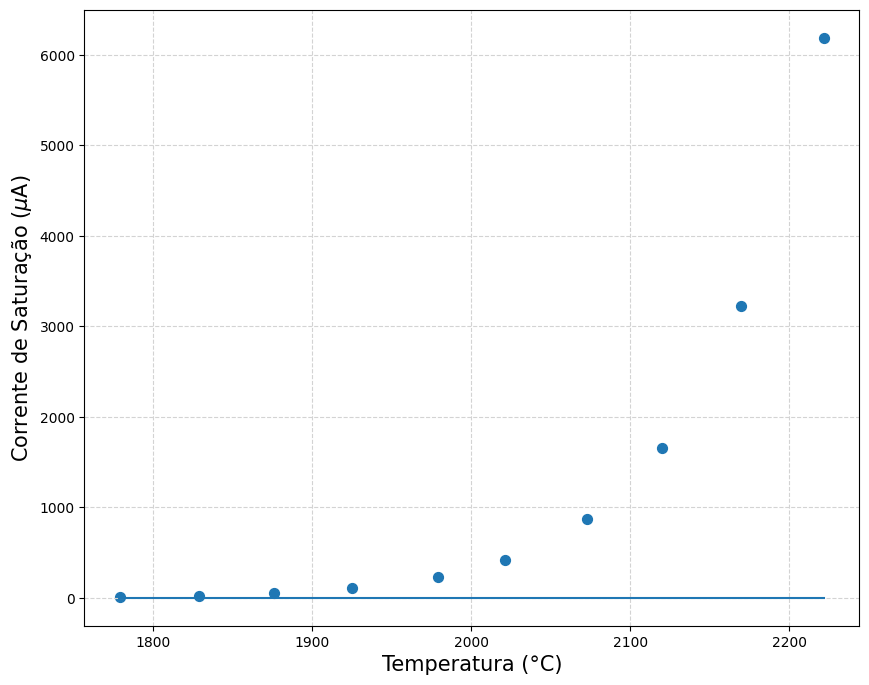

In [ ]:
RRD = pd.read_csv("RRD_2.csv")

#Transformar temperatura em Kelvin
T_K =[]
for index, row in RRD.iterrows():
  T_K.append(row["T (°C)"]+273)

RRD["T (K)"] = T_K

#função para calcular o regime de richard - D
def I_richard(dados):
  func_rich = []
  e = 1.602*10**-19
  m = 9.109*10**-31
  h = 6.626*10**-34
  pi = np.pi
  k_b = 1.38*10**-23
  w = 7.2*10**-18
  const = ((e*m*4*pi*(k_b**2))/h**3)
  for i in dados:
    func_rich.append((const*(i)**2)*np.exp(-w/(k_b*(i)))*10**6)
  return func_rich

j_richard = I_richard(RRD["T (K)"])

count = 0
area = []
for index, row in RRD.iterrows():
  area.append(row["I (micro A)"]/j_richard[count])
  count =+ 1
print(area)

plt.figure(figsize=(10,8))
plt.scatter(y=RRD["I (micro A)"], x=RRD["T (K)"], s=50)
plt.plot(RRD["T (K)"], j_richard)
plt.xlabel("Temperatura (°C)", fontsize=15)
plt.ylabel(r"Corrente de Saturação ($\mu$A)",fontsize=15)
plt.grid(True, linestyle="--", c="lightgray")
plt.show()



Função Trabalho (eV) 4.503013224848474


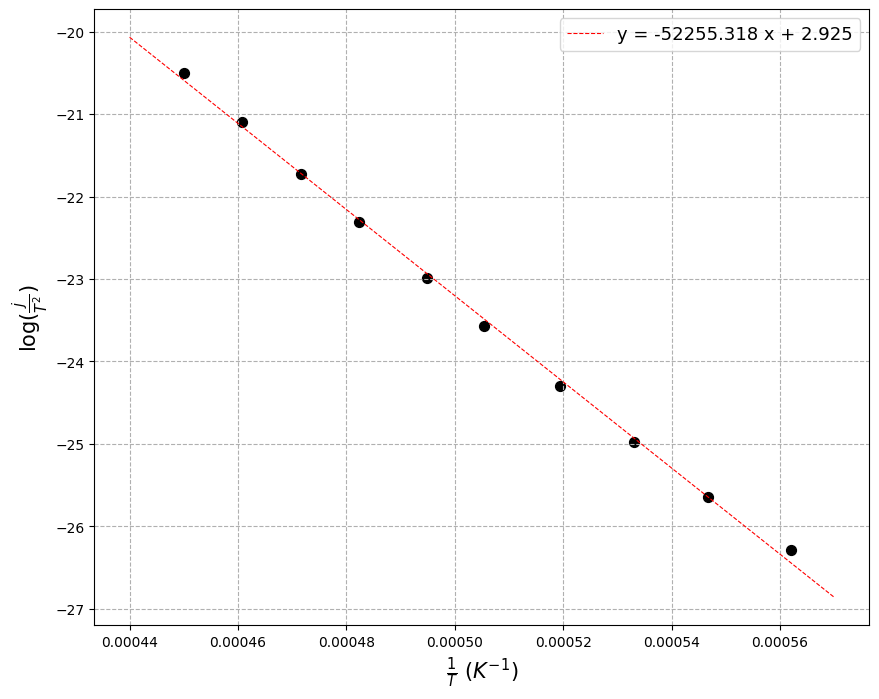

In [ ]:
#Importação dos dados
RRD = pd.read_csv("RRD_2.csv")

#Transformar temperatura em Kelvin
T_K =[]
for index, row in RRD.iterrows():
  T_K.append(row["T (°C)"]+273)
RRD["T (K)"] = T_K

#Listas para agregar as transformações da equação
j_por_T_sqr = []
inverso_T = []

#função para transformar os dados
for indew, row in RRD.iterrows():
  #Calcular a razão da corrente em Ampere para cada temperatura em Kelvin
  j_por_T_sqr.append(row["I (micro A)"]*10**-6/((row["T (K)"])**2))
  #Calcular o inverso da temperatura em Kelvin
  inverso_T.append(1/(row["T (K)"]))

#Calcular o log da razão
y_grafico = np.log(np.array(j_por_T_sqr))

# Realizar a regressão da reta obtida
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

model = ln.fit(np.array(inverso_T).reshape(-1,1), y_grafico)

x = np.arange(0.00044, 0.00058, 0.00001)
y = model.predict(np.array(x).reshape(-1,1))

#Obter a função trabalho por meio do coeficiente ângular*const. boltzmann em ev
kb_ev = 8.61733*10**-5
w = -model.coef_[0]*kb_ev

print("Função Trabalho (eV)", w )

#Gráfico da reta de log(j/T²) x 1/T
plt.figure(figsize=(10,8))
plt.scatter(x=inverso_T, y=y_grafico, s=50, c="black")
plt.plot(x, y, linestyle="--", c="r", linewidth=0.8, label=f"y = {model.coef_[0]:.3f} x + {model.intercept_:.3f}")
plt.grid(True, linestyle="--")
plt.title("")
plt.xlabel(r"$\frac{1}{T}$ ($K^{-1}$)", fontsize=15)
plt.ylabel(r"log($\frac{j}{T^2}$)", fontsize=15)
plt.legend(fontsize=13, loc="upper right")
plt.show()


In [ ]:
#Considerando o coeficiente linear da reta obtida acima, calculamos a dependência de W com a temperatura
b = model.intercept_

#Considerando as constantes físicas abaixo de maneira que k_b esta em Joule, diferente do considerado acima em eV
#Isso foi considerado para tem compatibilidade com as unidade da constante A0
e, m, h, pi, k_b = 1.602*10**-19, 9.109*10**-31, 6.626*10**-34, np.pi, 1.38*10**-23
A0 = ((e*m*4*pi*(k_b**2))/h**3)
log_A0 = np.log(A0)

#calculando alpha de modo que sua unidade seja J/K
alpha = -(b-log_A0)*k_b
print(f"alpha = {alpha:.3e}")


alpha = 1.528e-22


In [ ]:
# Cálculo do campo com unidades padrões

B_1600 = pd.read_csv("B_1600.csv")
B_1700 = pd.read_csv("B_1700.csv")
B_1800 = pd.read_csv("B_1800.csv")

B_1600.columns=["i_bob", "i_cat"]
B_1700.columns=["i_bob", "i_cat"]
B_1800.columns=["i_bob", "i_cat"]

B_1600["i_cat"] = B_1600["i_cat"]*10**-6
B_1700["i_cat"] = B_1700["i_cat"]*10**-6
B_1800["i_cat"] = B_1800["i_cat"]*10**-6

def b_helm(dados):
  b = []
  mu_0 = cte.mu_0
  N = 130
  R = 0.155
  for i in dados:
    b.append(((8/5**1.5) * mu_0 * N * i/ R))
  return b

B_1600["b_helm"] = b_helm(B_1600["i_bob"])
B_1700["b_helm"] = b_helm(B_1700["i_bob"])
B_1800["b_helm"] = b_helm(B_1800["i_bob"])

In [ ]:
from scipy.optimize import fsolve

mean1 = np.mean(B_1600["i_cat"].iloc[0:6])
mean2 = np.mean(B_1700["i_cat"].iloc[0:6])
mean3 = np.mean(B_1800["i_cat"].iloc[0:7])

slope1, intercept1, _, _, _ = stats.linregress(B_1600["b_helm"].iloc[6:17], B_1600["i_cat"].iloc[6:17])
slope2, intercept2, _, _, _ = stats.linregress(B_1700["b_helm"].iloc[4:14], B_1700["i_cat"].iloc[4:14])
slope3, intercept3, _, _, _ = stats.linregress(B_1800["b_helm"].iloc[5:14], B_1800["i_cat"].iloc[5:14])

def equation1(x):
  return slope1*x + intercept1 - mean1
def equation2(x):
  return slope2*x + intercept2 - mean2
def equation3(x):
  return slope3*x + intercept3 - mean3

x_b = np.arange(0,0.003,0.0001)

x_intercept_1 = fsolve(equation1, 0)
x_intercept_2 = fsolve(equation2, 0)
x_intercept_3 = fsolve(equation3, 0)
print(f"The functions intersect at x = {x_intercept_1[0]} with temperature of 1600°C")
print(f"The functions intersect at x = {x_intercept_2[0]} with temperature of 1700°C")
print(f"The functions intersect at x = {x_intercept_3[0]} with temperature of 1800°C")

plt.figure(figsize=(10,8))
plt.scatter(y=B_1600["i_cat"], x=B_1600["b_helm"], s=50, label = 'T = 1600 °C')
plt.scatter(y=B_1700["i_cat"], x=B_1700["b_helm"], s=50, label = 'T = 1700 °C')
plt.scatter(y=B_1800["i_cat"], x=B_1800["b_helm"], s=50, label = 'T = 1800 °C')

plt.hlines(y=mean1, xmin=0, xmax=5, linestyle='--', color='blue', alpha=0.5)
plt.plot(x_b, slope1*x_b + intercept1, linestyle='--', color='blue', alpha=0.5)
plt.vlines(x=x_intercept_1[0], ymin=0, ymax=mean1, linestyle='--', color='blue')

plt.hlines(y=mean2, xmin=0, xmax=5, linestyle='--', color='orange', alpha=0.5)
plt.plot(x_b, slope2*x_b + intercept2, linestyle='--', color='orange', alpha=0.5)
plt.vlines(x=x_intercept_2[0], ymin=0, ymax=mean2, linestyle='--', color='orange')

plt.hlines(y=mean3, xmin=0, xmax=5, linestyle='--', color='green', alpha=0.5)
plt.plot(x_b, slope3*x_b + intercept3, linestyle='--', color='green', alpha=0.5)
plt.vlines(x=x_intercept_3[0], ymin=0, ymax=mean3, linestyle='--', color='green')

plt.xlabel(r"$B_{Helm}$ (T)", fontsize=15)
plt.ylabel(r"$I_A$ (A)",fontsize=15)
plt.grid(True, linestyle="--", c="lightgray")
plt.xlim(-0.00001, 0.0016)
plt.ylim(0, 0.0000021)
plt.legend(fontsize=13)
plt.show()

NameError: name 'B_1600' is not defined

In [ ]:
#Cálculo da razão carga massa com os dados obtidos

v = [0.85, 0.75, 0.67]
b = [x_intercept_1[0], x_intercept_2[0], x_intercept_3[0]]

def carga_massa(b, v):
  e_m = []
  d = 1.8/100
  for i in range(3):
    e_m.append((2 * v[i] / (b[i]* d)**2) / 10**11 )
  return e_m

carga_massa = carga_massa(b,v)
real_value = (cte.e / cte.electron_mass) / 10**11

print(carga_massa)
print(f'Valor real:{real_value}')

for i in range(3):
  erro_relativo = (abs(carga_massa[i] - real_value) / real_value) * 100
  print(f'Erro relativo: {erro_relativo}')


[0.5487007140430238, 0.7041344175694195, 0.5691989073296327]
Valor real:1.758820010772163
Erro relativo: 68.80290702388976
Erro relativo: 59.965521585105904
Erro relativo: 67.63745557569925


In [ ]:
B = np.sqrt((2*cte.electron_mass*8.2)/(cte.e*(0.018**2)))
I = B*5**1.5*0.155/(8*cte.mu_0*130)
print(B*10**3)

0.5364616979714057
